In [1]:
import ansys.aedt.core
import os
import tempfile
import time
from ansys.aedt.core import Maxwell3d
from ansys.aedt.core import Maxwell2d



In [ ]:
AEDT_VERSION = "2025.1"
NUM_CORES = 8
NG_MODE = False  # Open AEDT UI when it is launched.

In [2]:
BaseDir="D:\EM_KDH\Moa_Edu_Sim\Basic"

# Intro


$-\nabla \cdot(c \nabla u)+a u=f$ on domain $\Omega$ \
with boundary condition $u=g$ on $\partial \Omega$.

$\int_{\Omega}(-\nabla \cdot(c \nabla u)+a u-f) v d \Omega=0 \quad \forall v$

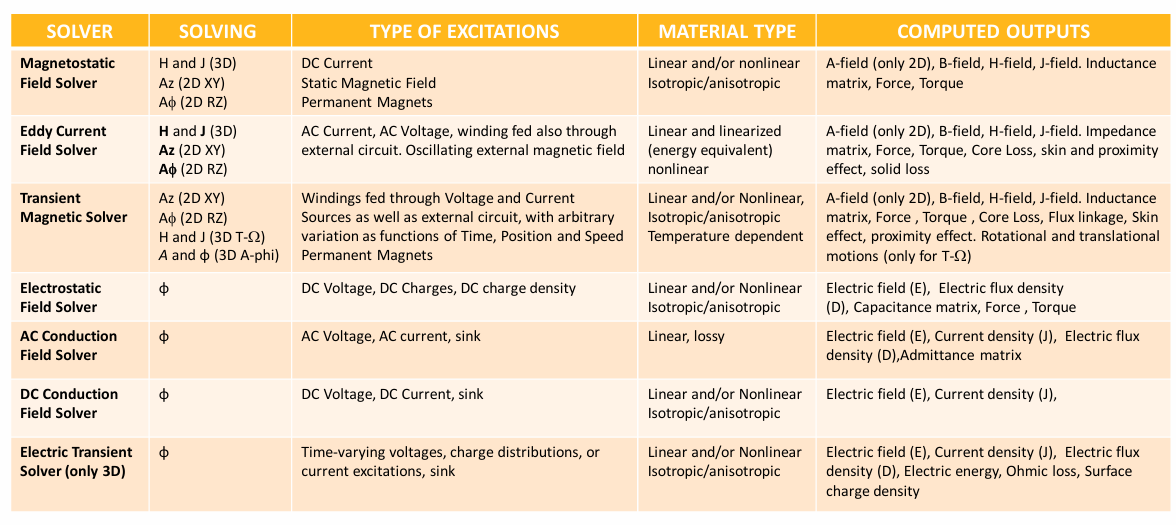

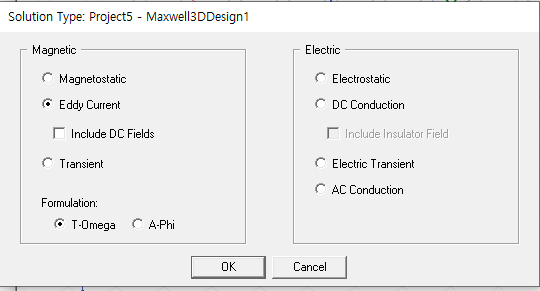          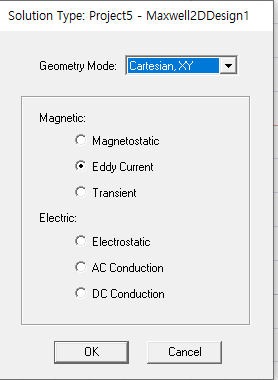\
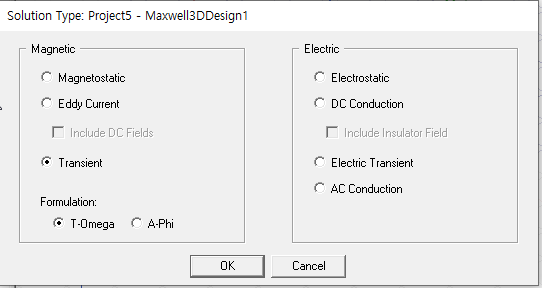

## Beta Version 활성화

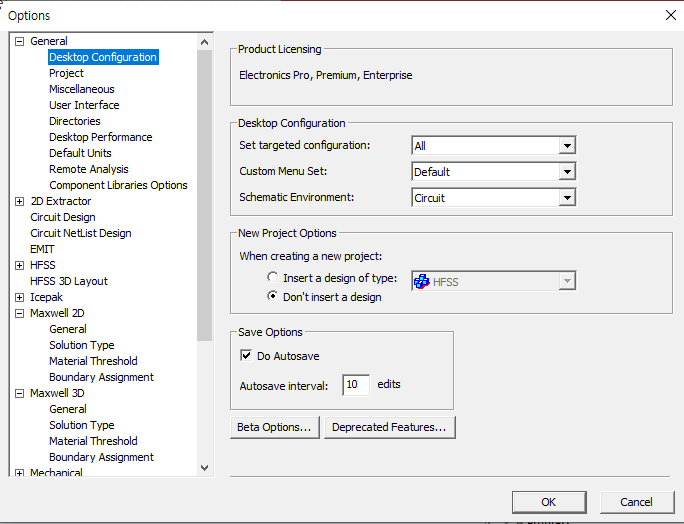

## 경계조건

맥스웰 방정식은 실제로 그 자체로는 충분하지 않으며, 그림 1에서 우리는 경계 조건의 심오한 효과를 볼 수 있습니다. 제가 '심오한'이라고 말하는 이유는 엔지니어에게 경계 조건이 주요 구성 요소의 물리적 속성을 표현하기 때문이며, 이러한 속성은 재료 속성뿐만 아니라 모양, 방향, 간격, 접합 및 기타 여러 가지 중요한 속성을 포함합니다. 자기장은 물리적 구성 요소보다 덜 실제적이라고 말할 수도 있습니다 

그림 1의 예는 금속성인 직사각형 튜브 또는 채널인 덕트 내에 위치한 무거운 직사각형 도체가 있는 이동 및 복귀 버스바의 예입니다. 이 문서에서는 덕트의 벽을 다이어그램에 추가하고 이를 식별하기 위해 해칭했으며, 벽 두께는 필드 솔루션의 직사각형 영역 수평 선형 치수의 1/40입니다. 버스바의 DC 전류가 ±6A/mm2인 경우, 자기장은 이 도메인의 전체 둘레에 대해 두 가지 경계 조건으로 풀립니다.

수학자에게 설명하자면, 우리는 경계가 B와 D의 녹색 선 또는 A와 C의 빨간색 선인 영역 안 또는 그 위에서 맥스웰 방정식(특히 라플라스 방정식)의 해를 찾고 있다는 것입니다. 이것이 바로 경계값 문제의 본질입니다. 유한 요소 해법은 경계 밖에서 일어나는 일에 대해 침묵하며, 이는 (사용자로서) 내가 영역의 경계를 정의한 사람이기 때문에 (자연 또는 대칭을 선택하여 정확한 수학적 용어로) 전적으로 적절합니다. 따라서 유한 요소 해법에서 그 경계 밖의 조건에 대한 데이터를 찾는 것은 부적절하며, 유한 요소 소프트웨어가 그러한 데이터를 제공하는 것도 마찬가지로 부적절합니다. (당연한 일이다!)

# Electric Solver

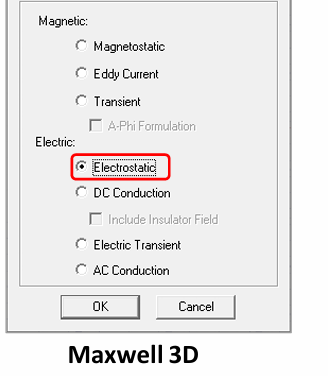 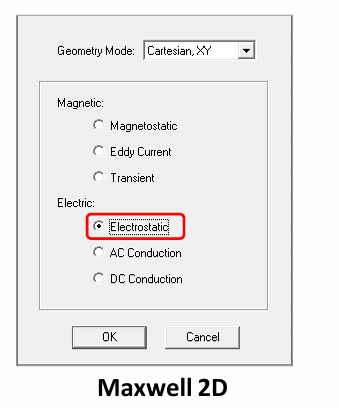


- ES
- DC Conduction
- AC Conduction
- Electric Transient 

## ES Solver

- 정전기 솔버는 정지된 전하 분포 또는 적용된 전위에서 발생하는 정전기장을 구합니다. 
- 전기장(E) 및 자속 밀도(D)는 스칼라 전위($\Phi$)로부터 계산됩니다.
- 도체 내부의 모든 전계는 정전기 평형 상태(전류 흐름이 없음)에서 완벽하고 등전위라고 가정하므로 줄 손실은 모든 곳에서 0입니다.

Governing Equation\
[3D]\
$\nabla \cdot\left(\varepsilon_r \varepsilon_0 \nabla \Phi\right)=-\rho_v$ \
[2D]\
$\nabla \cdot\left(\varepsilon_r \varepsilon_0 \nabla \Phi(x, y)\right)=-\rho \quad$ Cartesian $X Y$ \
$\nabla \cdot\left(\varepsilon_r \varepsilon_0 \nabla \Phi(r, z)\right)=-\rho \quad$ Cylindrical about Z

$\varepsilon_r$: Relative permittivity\
$\varepsilon_0$: Vacuum permittivity\
$\Phi$: Electric Scalar potential\
$\rho_v$: Volume charge density 

### Constitutive Relation - Material Property

### 3D Boundary Conditions

Default boundary conditions are as follows:
- Natural : 매질간의 경계에 대해서 전계변위장의 법선(normal) 성분은 연속적이라는 것을 나타낸.
  - $\varepsilon_r \varepsilon_0 \nabla \Phi \cdot n = 0$
  - $D_1 \cdot n = D_2 \cdot n$
- Neumann :  솔루션 도메인의 외부에 대한 경계조건, E 필드는 경계에 접하고 있으며 플럭스는 경계를 넘을 수 없습니다.
  - $\varepsilon_r \varepsilon_0 \nabla \Phi \cdot n = q$
  - ($D_1 \cdot n = q$)
  - $E_1 \cdot t = E_2 \cdot t$
  

Insultaing
- E 필드는 얇은 절연 경계를 가로질러 불연속적
- 레이어의 상대 투과율과 두께를 지정하여 얇은 절연 레이어를 모델링하는 데 사용

### 2D/3D Boundary Conditions

- Matching
- Symmetry

### 2D Boundary Conditions

- Balloon :
  - Voltage : voltage is zero at infinity
  - charge :  무한대의 전하가 해 영역의 전하와 일치하여 순 전하가 0이 됩니다.

### Excitation 

- voltage
- charge
- floating
- volume charge Density

## DC Conduction

## AC Conduction

## Electric Transient

# 2D Solver

In [ ]:
from ansys.aedt.core import Maxwell2d
# project_name = 
m2d = Maxwell2d(
    project=project_name,
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)
rect1=m2d.modeler.create_rectangle([0, 0], [10, 10], name="rect1", matname="copper")
rect1.id
m2dModel=m2d.modeler
m2dModel.object_list   # List of objects in the model
m2dModel.object_names
rect1_1=m2dModel.get_object_from_name("rect1_1")
rect1=m2dModel.get_object_from_name("rect1")
rect1.color='Red'
Vertrect=rect1.vertices
rect1.fillet(Vertrect[1],None,0.5,0)


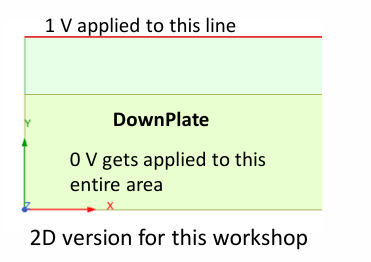
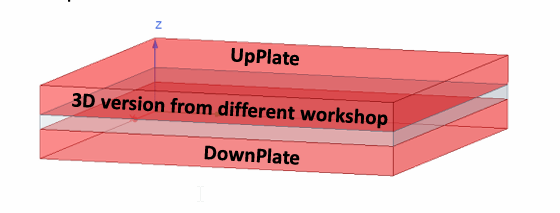

## 2D Cylinder Capacitor - ES WS 5.4

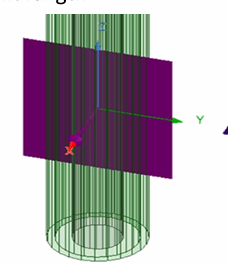
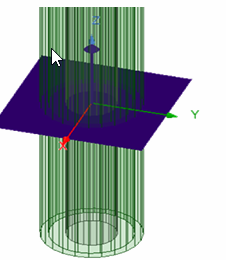

# 3D Solver

## ES

### [3D PlanarCapacitor]_ES WS 5.1

In [94]:
m3d = Maxwell3d(
    # project="D:\EM_KDH\Moa_Edu_Sim\Basic\CylinderCapacitor.aedt",
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)

PyAEDT INFO: Python version 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
PyAEDT INFO: PyAEDT version 0.11.7.
PyAEDT INFO: Returning found Desktop session with PID 53972!
PyAEDT INFO: No project is defined. Project Maxw_GS_ES_PC1 exists and has been read.
PyAEDT INFO: Active Design set to Maxw_3DES_PC1
PyAEDT INFO: Aedt Objects correctly read


In [96]:
# m3dOdesign=m3d.odesign
# m3dOdesign.SetSolutionType("Electrostatics")
m3dModel=m3d.modeler

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


In [ ]:
materials = m3d.materials
# conduc=materials.mat_names_aedt   

#### Modeling

In [ ]:
downPlate=m3dModel.create_box([0,0,0],[25,25,2],name="downPlate",material="pec")
upPlate=m3dModel.create_box([0,0,3],[25,25,2],name="upPlate",material="pec")
downPlate.color='Red'
upPlate.color='Red'

In [101]:
Gap=m3dModel.create_box([0,0,2],[25,25,1],name="Gap",material="vacuum")
Gap.color='Gray'

#### [excitation]

In [ ]:
downVoltage=m3d.assign_voltage(downPlate,0,"downVoltage")
upVoltage=m3d.assign_voltage(upPlate,1,"upVoltage")

In [115]:
m3d.assign_matrix(["downVoltage","upVoltage"],'Matrix1')

#### Setup

In [117]:
solSetupObj=m3d.create_setup("Setup1")
solSetupObj.available_properties
solSetupObj.props["MaximumPasses"]=10
solSetupObj.props["PercentError"]=1
solSetupObj.props["Enabled"]=1
solSetupObj.props["SolveMatrixAtLast"]="True"
solSetupObj.props["PercentRefinement"]=50
solSetupObj.props["MinimumPasses"]=2
solSetupObj.props["MinimumConvergedPasses"]=1


#### [Analyze]

In [118]:
m3d.valid_design
m3dAnalyObj=m3d.analyze()

PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Maxwell 3D correctly changed.
PyAEDT INFO: Solving all design setups.
PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Maxwell 3D correctly changed.
PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 13.0s


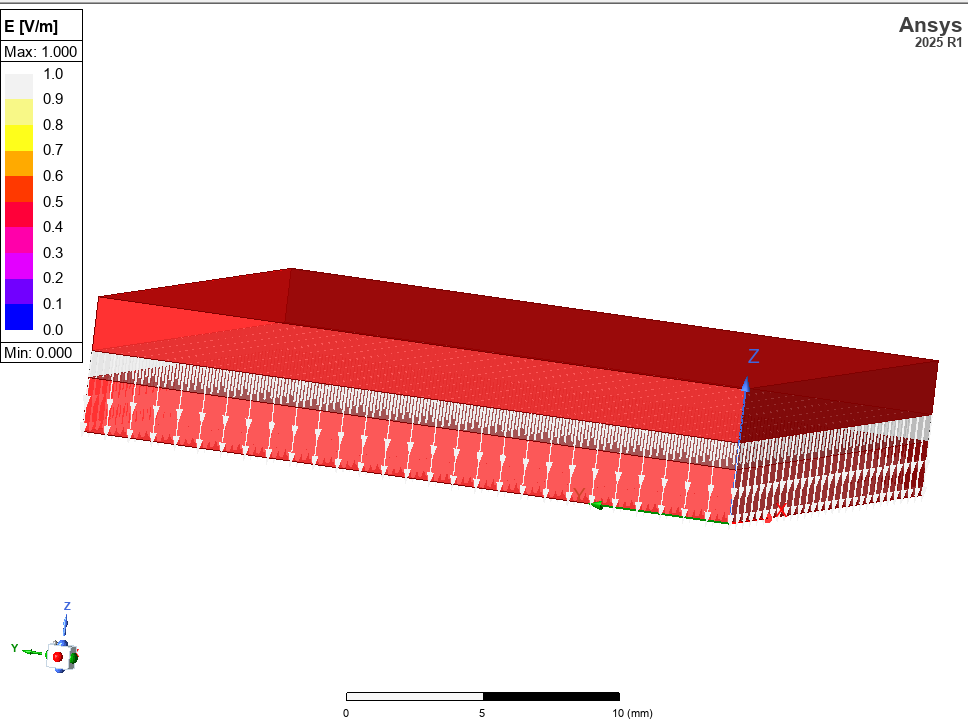

### [3D Cylindrical Capacitor]_ES + 2D CC 5.4


In [ ]:
m3dCylinder = Maxwell3d(
    project="D:\EM_KDH\Moa_Edu_Sim\Basic\CylinderCapacitor.aedt",
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)


In [ ]:
m3dCylyderOdesign=m3dCylinder.odesign
m3dCylyderOdesign.SetSolutionType("Electrostatic")

#### geometry

In [ ]:
cylinderInnerObj=m3dCylinder.modeler.primitives.create_cylinder([0, 0, 0],
                         [0, 0, -4],
                         radius=0.6,
                         height=25,
                         num_sides=24,
                         name="Inner",
                         materials="copper")

In [ ]:
cylinderOuterObj=m3dCylinder.modeler.primitives.create_cylinder([0, 0, 0],
                         [0, 0, -4],
                         radius=1.2,
                         height=25,
                         num_sides=24,
                         name="Outer",
                         materials="copper")

In [ ]:
VaccumObj=m3dCylinder.modeler.primitives.create_cylinder([0, 0, 0],
                         [0, 0, -4],
                         radius=1,
                         height=25,
                         num_sides=24,
                         name="Gap",
                         materials="vaccum")

In [ ]:
m3dCylinderModel.subtract([cylinderOuterObj.id],[VaccumObj.id],False)

In [ ]:
RegionObj=m3dCylinderModel.create_region(
        pad_value=[300,300,300,300,0,0],
        pad_type='Percentage Offset',  
        name='Region',  
        material='Vacuum',
) 


#### Assign

In [ ]:
m3dCylinder.assign_material(["Inner"],'copper')
m3dCylinder.assign_material(["Outer"],'copper')

m3dCylinderModel=m3dCylinder.modeler

In [ ]:
m3dCylinder.assign_voltage("Inner",0,"InnerVoltage")

In [ ]:
m3dCylyderOdesign.ChangeProperty(
	[
		"NAME:AllTabs",
		[
			"NAME:Maxwell3D",  # Tab Name
			[
				"NAME:PropServers", 
				"BoundarySetup:InnerVoltage"  # property_objectstr (전체다)
			],
			[
				"NAME:ChangedProps",
				[
					"NAME:Voltage",
					"Value:="		, "-1000V"
				]
			]
		]
	])
m3dCylinder.change_property(m3dCylyderOdesign,'Maxwell3D','BoundarySetup:InnerVoltage','Voltage','-1000V')

In [ ]:
m3dCylinder.assign_voltage("Outer",1000,"OuterVoltage")
m3dCylinder.assign_matrix(["InnerVoltage","OuterVoltage"],'Matrix1')
m3dCylinder.assign_force(["Inner"],coordinate_system='Global',is_virtual=True,force_name='Force1')

#### Setup

In [ ]:
solCylinder3dSetupObj=m3dCylinder.create_setup("Setup1")
# solCylinder3dSetupObj.available_properties
solCylinder3dSetupObj.props["MaximumPasses"]=10
solCylinder3dSetupObj.props["PercentError"]=1
solCylinder3dSetupObj.props["Enabled"]=1
solCylinder3dSetupObj.props["SolveMatrixAtLast"]="True"
solCylinder3dSetupObj.props["PercentRefinement"]=50
solCylinder3dSetupObj.props["MinimumPasses"]=2
solCylinder3dSetupObj.props["MinimumConvergedPasses"]=1

#### Post

In [ ]:
import ansys.aedt.core.visualization.post.common

In [ ]:
m3CylinderPost=m3dCylinder.post


In [ ]:
m3CylinderPost.plot_field('Mag_E','Region','Volume')

#### def create_3d_plot
#### def get_solution_data
#### get Sol

In [ ]:
solCylinderPost.export_data_to_csv('D:\EM_KDH\Moa_Edu_Sim\Basic/test.csv')

In [ ]:
m3CylinderPost.export_field_plot(plot_name='Mag_E2',output_dir='D:\EM_KDH\Moa_Edu_Sim\Basic')

In [ ]:
m3dBattery.odesign.SetSolutionType("Electrostatic")

In [ ]:
a=m3CylinderPost.ofieldsreporter

In [ ]:
m3CylinderPost.plot_field_from_fieldplot(plot_name='E',project_path="",mesh_plot=True,image_format='png',view='isometric',plot_label='',show=True,)

### [3D Battery Cylindrical]

In [ ]:
m3dBattery=Maxwell3d(
    project="D:\EM_KDH\Moa_Edu_Sim\Basic\Battery.aedt",
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)

In [ ]:
m3dBatteryModel=m3dBattery.modeler

In [ ]:
helixBattery=m3dBatteryModel.create_udp(dll="RectHelix.dll",parameters=[""],library="syslib")

In [ ]:
RectHelixObj=m3dBatteryModel.get_object_from_name('RectHelix1:CreateUserDefinedPart:1')

In [ ]:
m3dBatteryModel.create_udp(dll="SegmentedHelix/RectHelix.dll",parameters=[["RectHeight","75mm"], ["RectWidth","2mm"],["StartHelixRadius","12mm"],["RadiusChange","6mm"],["Pitch","0mm"],["Turns","2.5"],["SegmentsPerTurn","0"],["RightHanded","1"]],library="syslib",name='RectHelixD')

In [ ]:
m3dBatteryModel.update_udp(assignment="RectHelixD",
                           )

In [ ]:
from ansys.aedt.core import generic

# Magnetic Solver

- 자기 정전기 솔버에서는 코일을 통해 흐르는 직류 전류 또는 영구 자석으로 인해 발생하는 정적 자기장을 풉니다.
- 전류 전달 코일 내부의 전기장은 자기장과 완전히 분리되어 있습니다.
- 손실은 전류 전달 도체의 ohmnic 손실로 인한 것일 뿐입니다.
- The magnetostatic solver utilizes the automatic adaptive mesh refinement technique

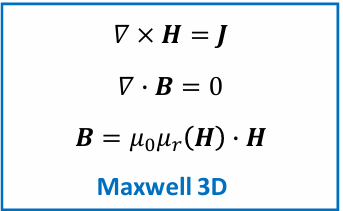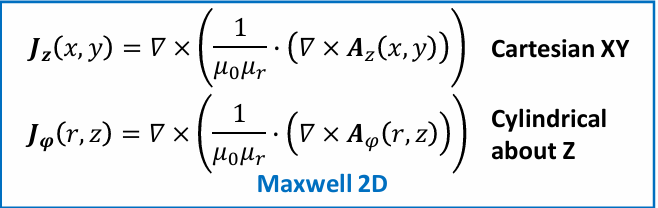


\begin{gathered}
\nabla \times \boldsymbol{H}=\boldsymbol{J} \\
\nabla \cdot \boldsymbol{B}=0 \\
\boldsymbol{B}=\mu_0 \mu_r(\boldsymbol{H}) \cdot \boldsymbol{H}
\end{gathered}

$H$: Magnetic field intensity\
$J$: Current density\
$B$: Magnetic flux density\
$\mu_0$: Vacuum permeability\
$\mu_r$: Relative permeability

In [ ]:
project_name = os.path.join(BaseDir, "2D_PlanarCapacitor.aedt")
# m2d = Maxwell2d(
#     project=project_name,
#     version=AEDT_VERSION,
#     new_desktop=False,
#     non_graphical=NG_MODE,
# )


# Vertrect=rect1.vertices
# rect1.fillet(Vertrect[1],None,0.5,0)
m2d = Maxwell2d(    version=AEDT_VERSION,
    new_desktop=False,
)


In [ ]:
out=m2d.modeler.create_rectangle([-40/2*1.1, -40/2/2.5*1.1], [40*1.1,40/2.5*1.1], name="rect1", matname="air")


In [ ]:
rect1=m2d.modeler.create_rectangle([-40/2, -40/2/2.5], [40,40/2.5], name="rect1", matname="copper")
rect1.id
m2dModel=m2d.modeler
m2dModel.object_list   # List of objects in the model
m2dModel.object_names
rect1_1=m2dModel.get_object_from_name("rect1_1")
rect1=m2dModel.get_object_from_name("rect1")
rect1.color='Red'

In [ ]:
BusBarL=m2d.modeler.create_rectangle([-20+40/6,(-40/2.5+40/2.5*0.8/4)/2], [40/6,40/2.5*0.8], name="Busbar", matname="copper")
# BusBarR=m2d.modeler.create_rectangle([20+40/6,(-40/2.5+40/2.5*0.8/4)/2], [40/6,40/2.5*0.8], name="Busbar", matname="copper")


## Eddy 

## 2D-MS

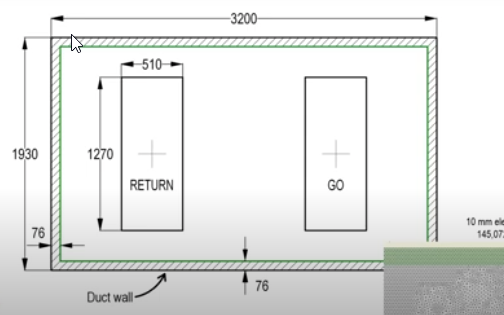

In [ ]:
m2dModeler=m2d.modeler
m2dModeler.model_units='mm'

±6A/mm^2 is in A/m^2 = 6e6 A/m^2

In [ ]:

# Duct wall outer boundary (OutMost)

OutMost = m2d.modeler.create_rectangle(position=[0, 0], dimension_list=[3200', 1930], name="OutMost", matname="vacuum")
OutMost.color = "Black"


In [ ]:

# Duct wall inner boundary (with 76 thickness considered)
DuctWall = m2d.modeler.create_rectangle(position=[76, 76], dimension_list=[3200 - 2*76, 1930 - 2*76], name="DuctWall", matname="air")
DuctWall.color = "Green"


In [ ]:
DuctRegion = m2dModeler.subtract(['OutMost'], ['DuctWall'])

In [ ]:

# Adjust RETURN rectangle dimensions and position based on 76 thickness
rect1 = m2d.modeler.create_rectangle(
    position=[(3200 - 2*76)/4 - 510/2 + 76, ((1930 - 2*76) - 1270) / 2 + 76],
    dimension_list=[510, 1270],
    name="RETURN",
    matname="copper"
)
rect1.color = "Red"

# Adjust GO rectangle dimensions and position based on 76 thickness
rect2 = m2d.modeler.create_rectangle(
    position=[3*(3200 - 2*76)/4 - 510/2 + 76, ((1930 - 2*76) - 1270) / 2 + 76],
    dimension_list=[510, 1270],
    name="GO",
    matname="copper"
)
rect2.color = "Red"


In [ ]:
GoObj=m2d.modeler.get_object_from_name("GO")
ReturnObj=m2d.modeler.get_object_from_name("RETURN")


In [ ]:
ReturnObj.color="Red"
GoObj.color="Red"

In [ ]:
m2d.assign_current_density("GO","J",phase="0",current_density_x="0",current_density_y="0",current_density_z="6")
m3dCylinder.assign_current_density("Outer",1000,"OuterVoltage")


In [ ]:
# m2d.modeler.object_list
# # Create the duct-to-conductor region (AirRegion)
# # This region is the remaining air area inside the duct wall excluding the RETURN and GO conductors
# AirRegion = m2d.modeler.create_rectangle(position=[76, 76], dimension_list=[3200 - 2*76, 1930 - 2*76], name="AirRegion", matname="air")
# AirRegion.color = "Yellow"
# AirRegion.subtract([rect1.id, rect2.id])

# Print object information
for obj in m2d.modeler.object_list:
    print(f"Name: {obj.name}, Color: {obj.color}")

# Save the project
# m2d.save_project("duct_with_wall_thickness_adjusted.aedt")
# print("Project saved as 'duct_with_wall_thickness_adjusted.aedt'")


### Boundary Conditions

참고: 맥스웰 2D에서는 기본 경계 조건이 시뮬레이션 영역 가장자리인 시뮬레이션 영역 가장자리에 기본 경계 조건이 할당되지 않습니다. 사용자가 시뮬레이션의 동작을 지정해야 합니다.
벌룬 또는 벡터 포텐셜 경계를 지정하여 시뮬레이션의 동작을 지정해야 합니다.

- gradient operator : $\nabla$
-  $\vec{A}$ Normal to Boundary : $\vec{A} \cdot \vec{n}
- Gradient of  $\vec{A} \cdot \vec{n} : \nabla (\vec{A} \cdot \vec{n})$

 MagnetoStatic [2D]
#### - Vector Potential:(=dirichlet)
  - Sets the specified value of magnetic vector potential on the boundary.
    -  $A = (0,0,A_z)$
    -  $B=\nabla \times A$
    -  $B =(B_x, B_y, 0)$
  - Used to model Magnetically isolated structures.

   -  $A_z=0$


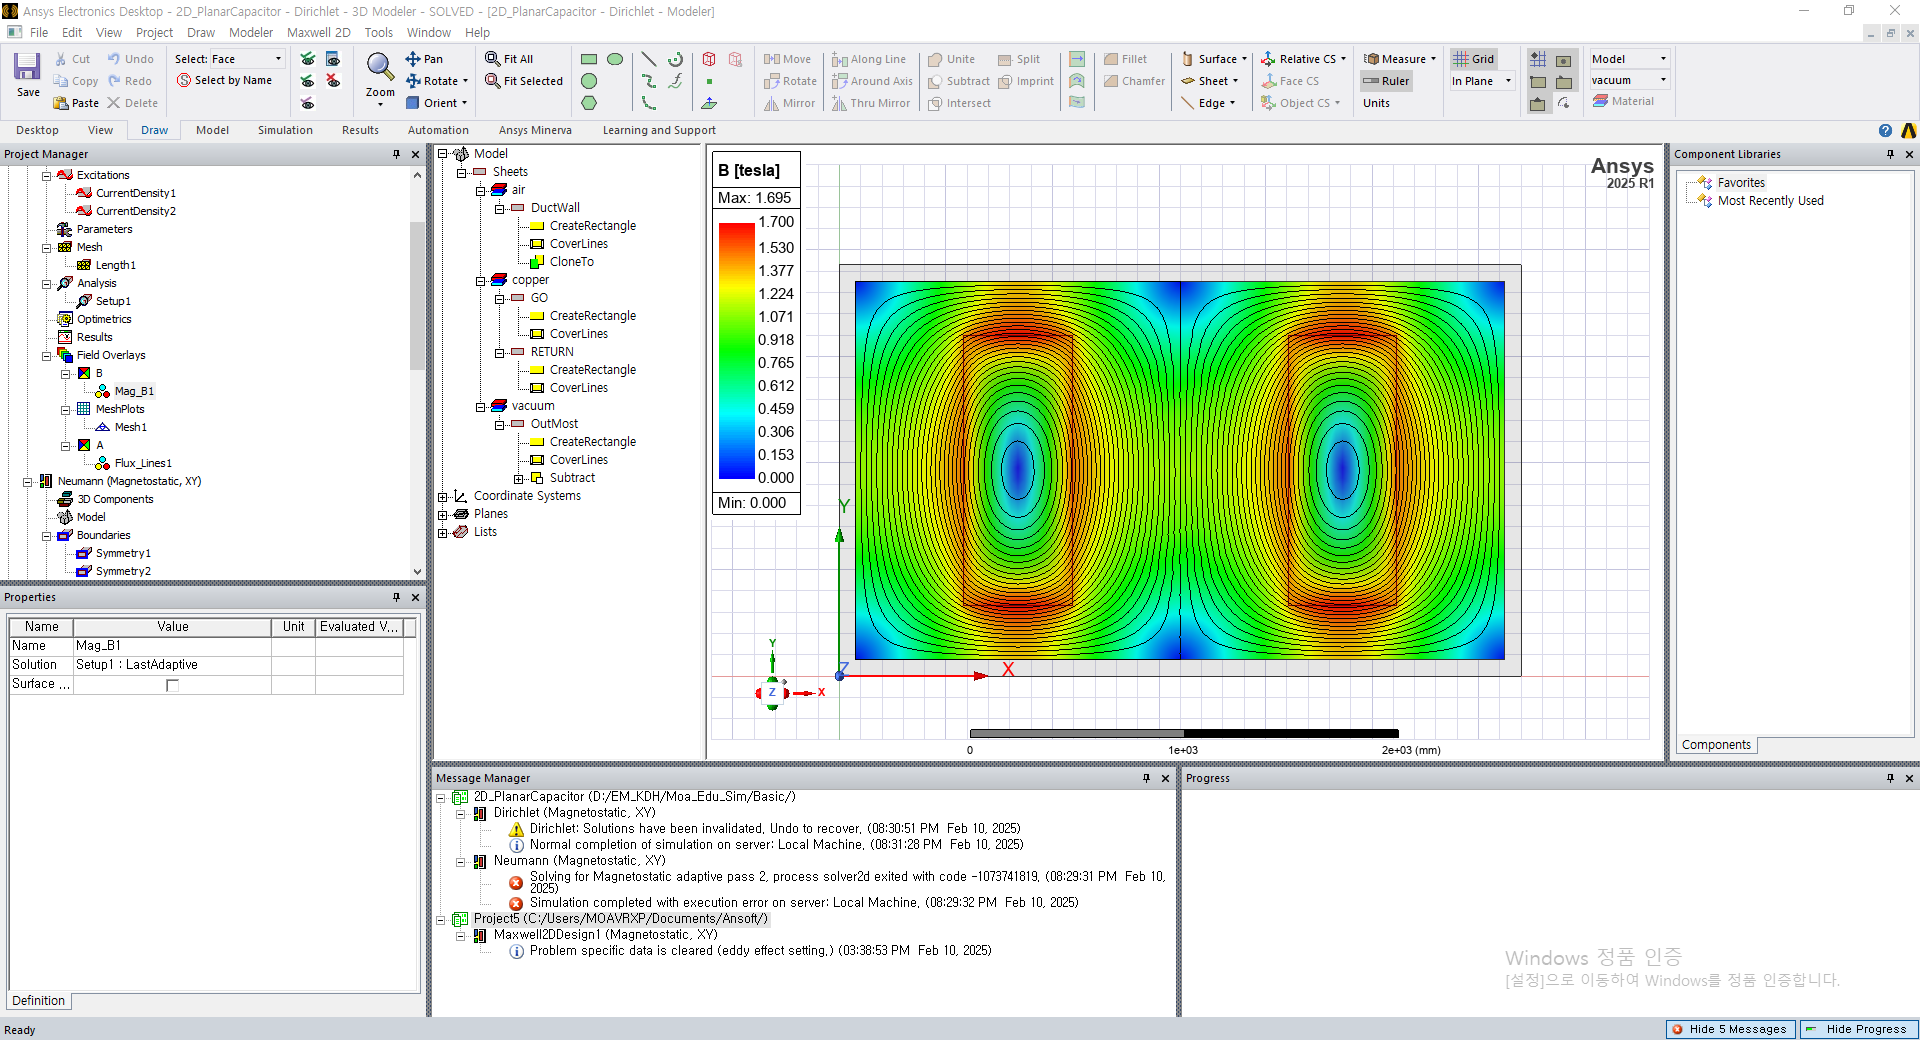

Beyond boundary conditions
https://www.jmag-international.com/seminar/prof_miller_seminar/vol_042/


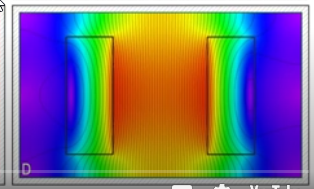

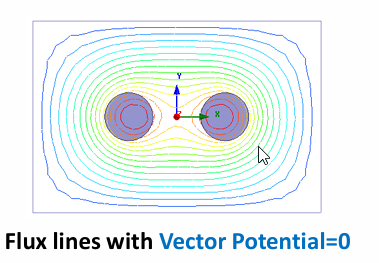

#### Ballon


#### Symmetry Boundary
- Odd (=Essential Boundary (=Dirichlet))
  - 이 경우 녹색 경계를 따라 gradient 없는 경계($∂A/∂n$)에 대한 A의 도함수입니다,
  - $∂A/∂n = 0$
  - normal component of B is zero across the boundary
  - B_n =0 
  - $B_t = \mu_0 J_t$
  
- Even( =Natural Boundary (=Neumann))
  - 이 경우 녹색 경계를 따라 gradient 없는 경계($∂A/∂n$)에 대한 A의 도함수입니다,
  - $∂A/∂n = 0$
  - B_t =0  ,tangential component of B is zero across the boundary
  - $B_n = \mu_0 J_n$



#### [2D/3D]
Matching (Independent/Dependent)

## MQS-Transient

# fillet 3D box edges with a given radius

In [ ]:
box1Obj=m3dModel.create_box([0,0,0],[10,10,10],name="box1",matname="copper")
box13D_vertices=box1Obj.vertices
box13D_vertices
box13D_edge=box1Obj.edges
box13D_vertices
edge4filltet=m3dModel.get_edgeids_from_vertexid(31,box1Obj.id)
box1Obj.fillet(None,edge4filltet[0:3],0.5,0)